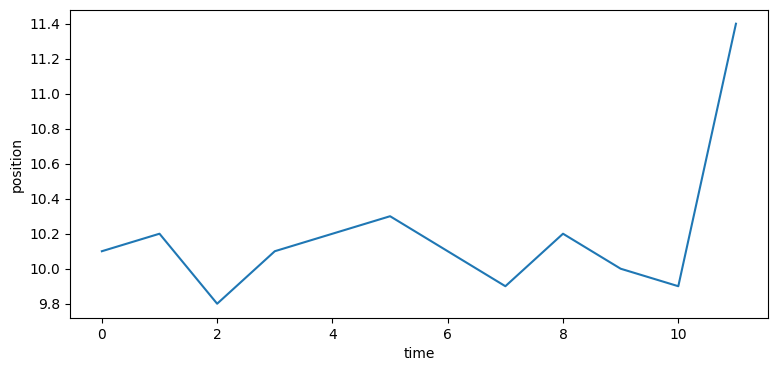

In [1]:
%matplotlib inline

#format the book
import book_format
book_format.set_style()

import matplotlib.pyplot as plt

data = [10.1, 10.2, 9.8, 10.1, 10.2, 10.3, 
        10.1, 9.9, 10.2, 10.0, 9.9, 11.4]
plt.plot(data)
plt.xlabel('time')
plt.ylabel('position');

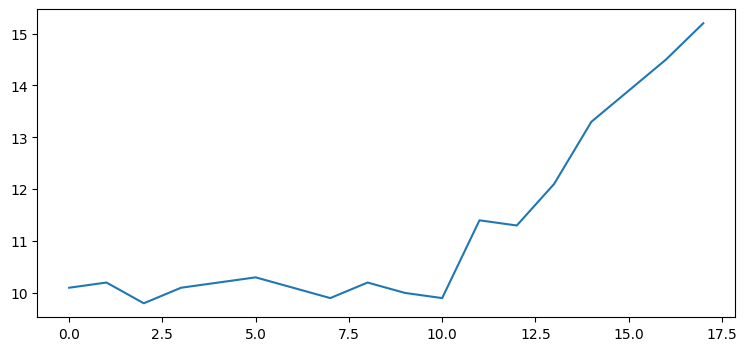

In [2]:
data2 = [11.3, 12.1, 13.3, 13.9, 14.5, 15.2]
plt.plot(data + data2);

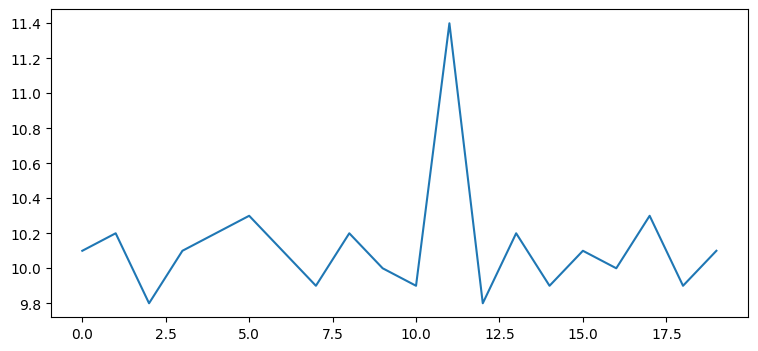

In [3]:
data3 = [9.8, 10.2, 9.9, 10.1, 10.0, 10.3, 9.9, 10.1]
plt.plot(data + data3);

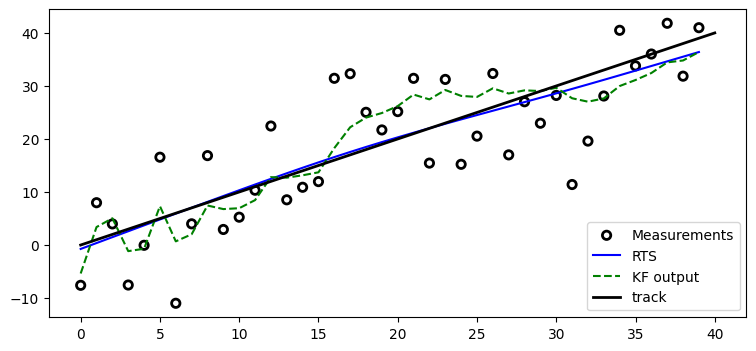

In [4]:
import numpy as np
from numpy import random
from numpy.random import randn
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import kf_book.book_plots as bp

def plot_rts(noise, Q=0.001, show_velocity=False):
    random.seed(123)
    fk = KalmanFilter(dim_x=2, dim_z=1)

    fk.x = np.array([0., 1.])      # state (x and dx)

    fk.F = np.array([[1., 1.],
                     [0., 1.]])    # state transition matrix

    fk.H = np.array([[1., 0.]])    # Measurement function
    fk.P*= 10.                     # covariance matrix
    fk.R = noise                   # state uncertainty
    fk.Q = Q_discrete_white_noise(dim=2, dt=1., var=Q)  # process uncertainty

    # create noisy data
    zs = np.asarray([t + randn()*noise for t in range (40)])

    # filter data with Kalman filter, than run smoother on it
    mu, cov, _, _ = fk.batch_filter(zs)
    M, P, C, _ = fk.rts_smoother(mu, cov)

    # plot data
    if show_velocity:
        index = 1
        print('gu')
    else:
        index = 0
    if not show_velocity:
        bp.plot_measurements(zs, lw=1)
    plt.plot(M[:, index], c='b', label='RTS')
    plt.plot(mu[:, index], c='g', ls='--', label='KF output')
    if not show_velocity:
        N = len(zs)
        plt.plot([0, N], [0, N], 'k', lw=2, label='track') 
    plt.legend(loc=4)
    plt.show()
    
plot_rts(7.)

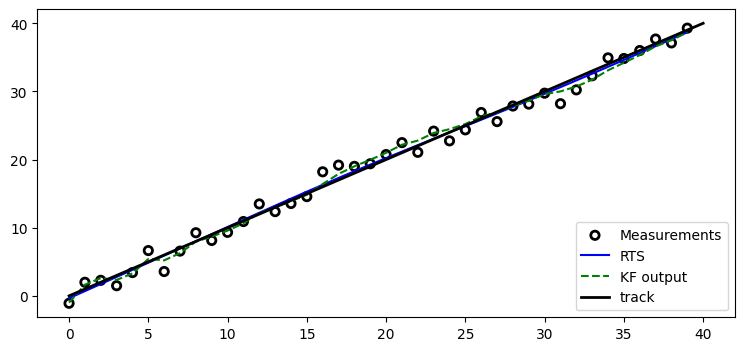

In [5]:
plot_rts(noise=1.)

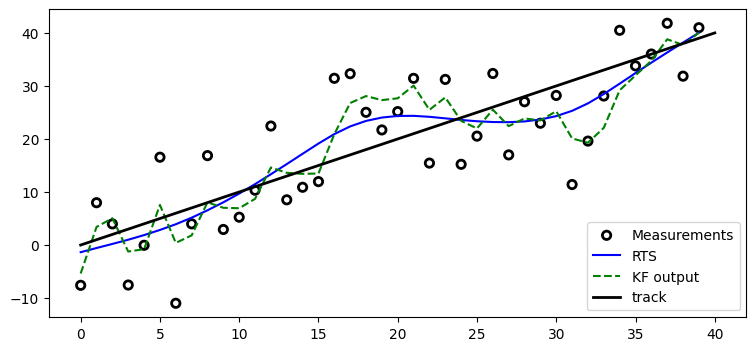

In [6]:
plot_rts(noise=7., Q=.1)

gu


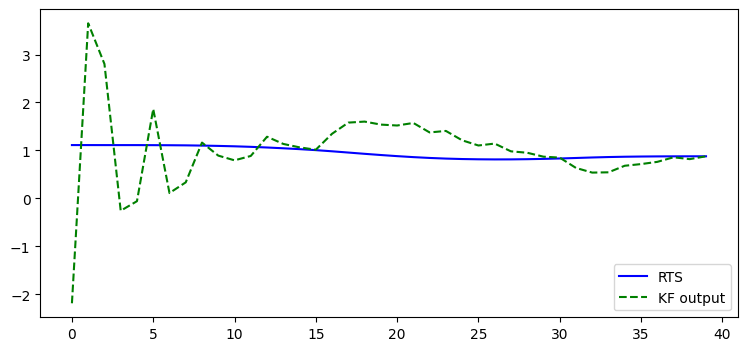

In [7]:
plot_rts(7.,show_velocity=True)

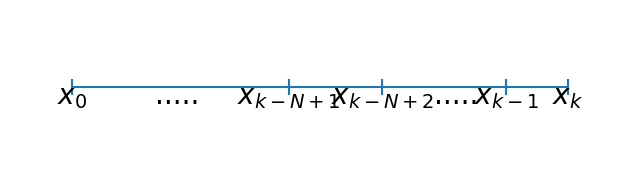

In [8]:
from kf_book.book_plots import figsize
from kf_book.smoothing_internal import *

with figsize(y=2):
    show_fixed_lag_numberline()

standard deviation fixed-lag: 2.616
standard deviation kalman: 3.564


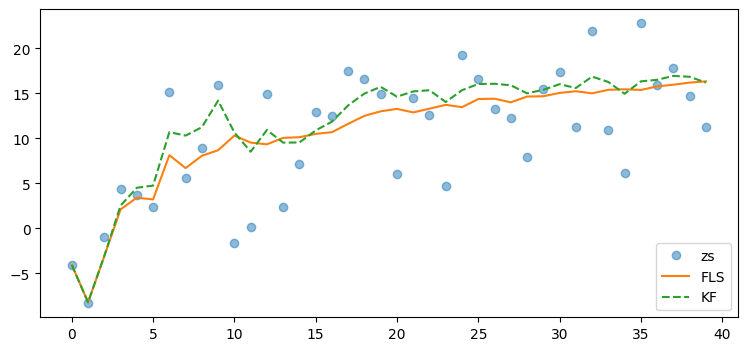

In [9]:
from filterpy.kalman import FixedLagSmoother, KalmanFilter
import numpy.random as random

fls = FixedLagSmoother(dim_x=2, dim_z=1, N=8)

fls.x = np.array([0., .5])
fls.F = np.array([[1.,1.],
                  [0.,1.]])

fls.H = np.array([[1.,0.]])
fls.P *= 200
fls.R *= 5.
fls.Q *= 0.001

kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., .5])
kf.F = np.array([[1.,1.],
                 [0.,1.]])
kf.H = np.array([[1.,0.]])
kf.P *= 200
kf.R *= 5.
kf.Q = Q_discrete_white_noise(dim=2, dt=1., var=0.001)

N = 4 # size of lag

nom =  np.array([t/2. for t in range (0, 40)])
zs = np.array([t + random.randn()*5.1 for t in nom])

for z in zs:
    fls.smooth(z)
    
kf_x, _, _, _ = kf.batch_filter(zs)
x_smooth = np.array(fls.xSmooth)[:, 0]


fls_res = abs(x_smooth - nom)
kf_res = abs(kf_x[:, 0] - nom)

plt.plot(zs,'o', alpha=0.5, label='zs')
plt.plot(x_smooth, label='FLS')
plt.plot(kf_x[:, 0], label='KF', ls='--')
plt.legend(loc=4)

print(f'standard deviation fixed-lag: {np.mean(fls_res):.3f}')
print(f'standard deviation kalman: {np.mean(kf_res):.3f}')